Install OpenCV and the nescessary libraries

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import matplotlib.pyplot as plt

For this I'm using pretrained model for objection detection. I download this frozen file from Mobilenet's Github page. 

In [ ]:
config_file = '/content/drive/MyDrive/Object_Detection/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = '/content/drive/MyDrive/Object_Detection/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb'

Here, i'm passing the frozen model and the configure file and make the instance of the model.


In [ ]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

Here, load the label file this file conatin 80 different classes. 

In [ ]:
classLabels = []
file_name = '/content/drive/MyDrive/Object_Detection/ClassLabels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [ ]:
print(classLabels)
print(len(classLabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


Here, I'm setting up the model

In [ ]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7f9c72209950>

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Object_Detection/men.jpg')

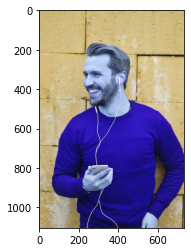

In [ ]:
plt.imshow(img)

Convert the color scale to original

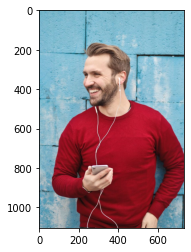

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Setting up the model thresold for the prediction

In [ ]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.7)
print(ClassIndex)

[1]


Defining the box for the output

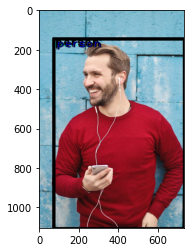

In [ ]:
font_scale = 4
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex. flatten(), confidence.flatten(), bbox):
    # adding the box around the image and defining the color and width of the box
    cv2.rectangle(img, boxes, (0, 0, 0), 7)
    # adding the label in the box and defining the color,style and width of the font
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes [1]+40), font, fontScale=font_scale, color=(255, 0, 0), thickness=2 )

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))